<a href="https://colab.research.google.com/github/jparkgit/JY_classes/blob/master/HW5_Pytorch_multinomial_regression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  박지현 - 1903055 - 생명과학과

# HW5 Multinomial logistic regression model
Solve the following problems in Pytorch_multinomial_regression.ipynb
1. Solve Exercise 2.3.4 (Iris data)
2. Solve Exercise 2.3.5 (Fashion Mnist data)

We will be using the famous Iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The goal is to predict the species of an iris flower based on these measurements.

In [132]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pandas as pd
from tqdm import tqdm

In [133]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

# One hot encode the y
t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)

# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


<ipython-input-133-7b3a72491778>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-133-7b3a72491778>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


In [134]:
for xx, tt in train_loader:
  print(xx, tt)

tensor([[-1.6223, -1.7375, -1.3924, -1.1799],
        [ 0.6722,  0.0979,  0.9868,  0.7880],
        [ 0.1892, -0.1315,  0.5903,  0.7880],
        [ 0.6722, -0.8198,  0.8735,  0.9192],
        [-1.1392, -1.2787,  0.4203,  0.6568],
        [ 0.7930, -0.1315,  0.8169,  1.0504],
        [ 0.3100, -0.5904,  0.1371,  0.1321],
        [ 0.3100, -0.3610,  0.5336,  0.2633],
        [ 1.1553, -0.1315,  0.9868,  1.1816],
        [-0.2939, -0.8198,  0.2504,  0.1321],
        [-0.4146, -1.5081,  0.0238, -0.1303],
        [ 0.7930, -0.1315,  0.9868,  0.7880],
        [-0.1731, -0.3610,  0.2504,  0.1321],
        [-0.5354, -0.1315,  0.4203,  0.3945],
        [-1.0184, -1.7375, -0.2594, -0.2615],
        [-1.0184,  1.2450, -1.3358, -1.3111]]) tensor([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],

## Exercise 2.3.4 Revisiting Iris data (HW)

We use `train_loader` to train the model, and use `test_loader` to calculate the test accuracy. Use the following code to train the model, and calculate the test accuracy. In this case, you need to define your own loss function to calculate cross-entropy function from `q_hat` and `tt`.
```
z_model = nn.Linear(784, 10, bias=True)
```
and
```
for xx, tt in train_loader:
  zhat = z_model(xx)
  q_hat = torch.softmax()
```

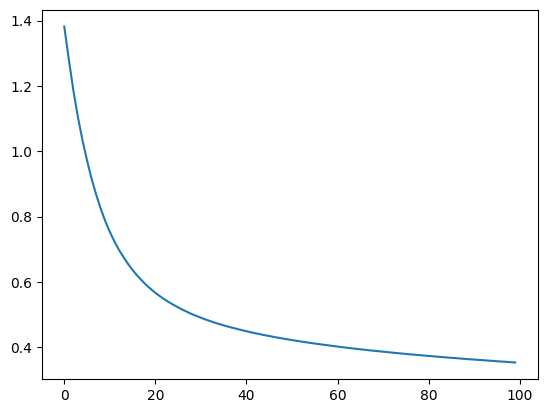

In [142]:
z_model = torch.nn.Linear(4, 3, bias=True)

loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')

optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)

n = X_train.shape[0]
history=[]
epochs = 100

for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    zhat = z_model(xx)
    #qhat = torch.softmax(zhat, dim=1)
    loss = loss_fn(zhat, tt)
    loss.backward()
    epoch_loss += loss.item()*len(xx)
    optimizer.step()
    optimizer.zero_grad()
  history.append(epoch_loss/n)

plt.plot(history)

### accuracy

In [144]:
def accuracy_fn(qhat, t):
  yhat = torch.argmax(qhat, axis=1).to(torch.float32)
  #print(yhat)
  y = torch.argmax(t, axis=1).to(torch.float32)
  #print(y)
  accuracy = torch.sum((y==yhat).to(torch.float32))
  #print(accuracy)
  return accuracy


accuracy_sum = 0

for X, T in test_loader:
  zhat = z_model(X)
  qhat = torch.softmax(zhat, dim=1)
  accuracy_sum += accuracy_fn(qhat,T).item()

print(accuracy_sum/len(X_val))

0.9666666666666667


### (hide) another way (PI)

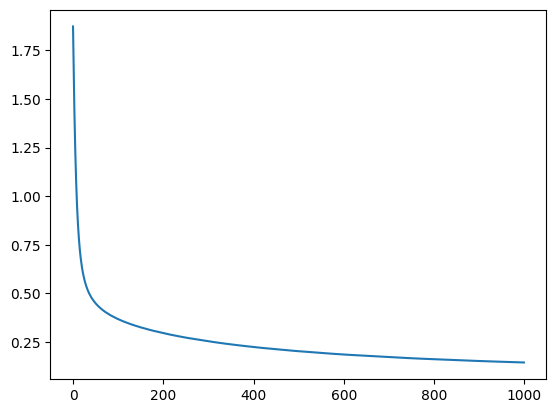

In [137]:
def loss_fn(qhat, tt):
  loss = -torch.mean(torch.sum(tt * torch.log(qhat), axis = 1))
  return loss

z_model = torch.nn.Linear(4, 3, bias=True)

optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)

n = X_train.shape[0]
history = []
epochs = 1000

for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    zhat = z_model(xx)
    qhat = torch.softmax(zhat, dim=1)
    loss = loss_fn(qhat, tt)
    loss.backward()
    epoch_loss += loss.item()*len(xx)
    optimizer.step()
    optimizer.zero_grad()
  history.append(epoch_loss/n)

plt.plot(history)

## Exercise 2.3.5: Fashion MNIST data (HW)

You are given the following fashion MNIST data. Do the multinomial regression so that the regression machine can determine the label from the images. \
Calculate the test accuracy. \
In the test dataset, identify at least 5 cases where your predictions are wrong, \
and explain why possibly they were mis-classified.

1. the picture

2. predicted label

3. real label

4. Explain the possible reason why your model is wrong in this case.

Hint: Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [5]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pandas as pd
from tqdm import tqdm

In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 13264674.80it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212629.26it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3894899.53it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23093344.38it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [3]:
xx, yy = trainset[0]

Ankle boot


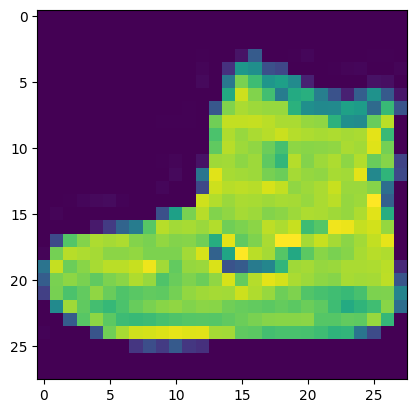

In [6]:
plt.imshow(xx.reshape(28,28))
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(my_name[yy])



### (hide) epoch 100으로 했더니 모두 알맞게 예측되어버린 경우

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')

z_model = torch.nn.Linear(784, 10, bias=True)

optimizer = torch.optim.SGD(z_model.parameters(), lr = 0.01)

# The Fashion-MNIST dataset contains 60,000 training images
# (and 10,000 test images)
n = 60000
epochs = 100
history = []

for epoch in tqdm(range(epochs)):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    # reshape 필요
    zhat = z_model(xx.reshape([-1, 784]))
    #qhat = torch.softmax(zhat, dim=1)
    #t_ = torch.nn.functional.one_hot(torch.tensor(tt, dtype = torch.int64), num_classes=10)
    loss = loss_fn(zhat, tt)
    epoch_loss += loss.item()*len(xx)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  history.append(epoch_loss/n)

plt.plot(history)

In [ ]:
accuracy_sum = 0

for X, Y in test_loader:
  zhat = z_model(X.reshape([-1,784]))
  qhat = torch.softmax(zhat, dim=1)
  # 확률기반 클래스 분류
  Yhat = torch.argmax(qhat, axis = 1).to(torch.float32)
  Y = Y.to(torch.float32)
  # test 데이터의 실제 클래스 값과 비교, 정확한 값=1로 해서 sum
  accuracy_sum += torch.sum((Y==Yhat)).to(torch.float32)

accuracy = accuracy_sum/len(validationset)
accuracy

잘못 예측한 경우 출력

In [11]:
print(Y==Yhat, Y[Y!=Yhat])

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True]) tensor([])



### epoch를 줄여서 좀 덜 학습시켜 보겠습니다.

100%|██████████| 20/20 [04:11<00:00, 12.59s/it]


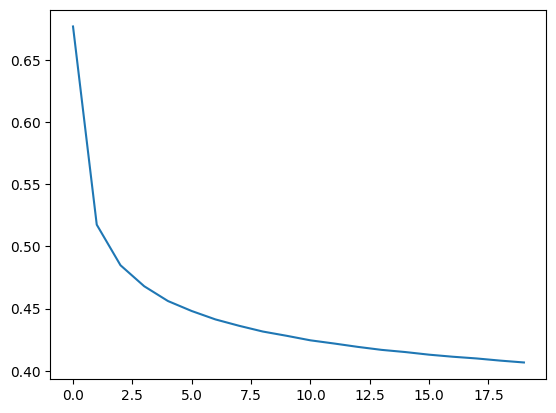

In [7]:
loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')

z_model = torch.nn.Linear(784, 10, bias=True)

optimizer = torch.optim.SGD(z_model.parameters(), lr = 0.01)

# The Fashion-MNIST dataset contains 60,000 training images
# (and 10,000 test images)
n = 60000
epochs = 20
history = []

for epoch in tqdm(range(epochs)):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    # reshape 필요
    zhat = z_model(xx.reshape([-1, 784]))
    #qhat = torch.softmax(zhat, dim=1)
    #t_ = torch.nn.functional.one_hot(torch.tensor(tt, dtype = torch.int64), num_classes=10)
    loss = loss_fn(zhat, tt)
    epoch_loss += loss.item()*len(xx)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  history.append(epoch_loss/n)

plt.plot(history)

### accuracy

In [8]:
accuracy_sum = 0

for X, Y in test_loader:
  zhat = z_model(X.reshape([-1,784]))
  qhat = torch.softmax(zhat, dim=1)
  # 확률기반 클래스 분류
  Yhat = torch.argmax(qhat, axis = 1).to(torch.float32)
  Y = Y.to(torch.float32)
  # test 데이터의 실제 클래스 값과 비교, 정확한 값=1로 해서 sum
  accuracy_sum += torch.sum((Y==Yhat)).to(torch.float32)

accuracy = accuracy_sum/len(validationset)
accuracy

tensor(0.8417)

### 잘못 예측한 경우들 살펴보기

In [103]:
incorrect_examples = []
incorrect_labels = []
incorrect_pred = []
#z_model.eval()

for X,Y in test_loader:
  zhat = z_model(X.reshape([-1,784]))
  qhat = torch.softmax(zhat, dim=1)
  # 확률기반 클래스 분류
  #Yhat = torch.argmax(qhat, axis = 1).to(torch.float32) # shape = torch.Size([batch_size, 10])
  Yhat = torch.argmax(qhat, dim=1, keepdim=True)
  #pred = output.argmax(dim=1, keepdim=True) #pred will be a 2d tensor of shape [batch_size,1]
  idxs_mask = ((Yhat == Y.view_as(Yhat))==False).view(-1)
  if idxs_mask.numel(): #if index masks is non-empty append the correspoding data value in incorrect examples
    incorrect_examples.append(X[idxs_mask].squeeze().cpu().numpy())
    incorrect_labels.append(Y[idxs_mask].cpu().numpy()) #the corresponding target to the misclassified image
    incorrect_pred.append(Yhat[idxs_mask].squeeze().cpu().numpy()) #the corresponiding predicted class of the misclassified image

[참고자료](https://discuss.pytorch.org/t/viewing-misclassified-image-predictions/82410/7)

1. Dress인데 Coat 처럼 길게 생겨서 잘못 예측된 듯 하다

The answer is: Dress
it was incorrectly predicted as: Coat


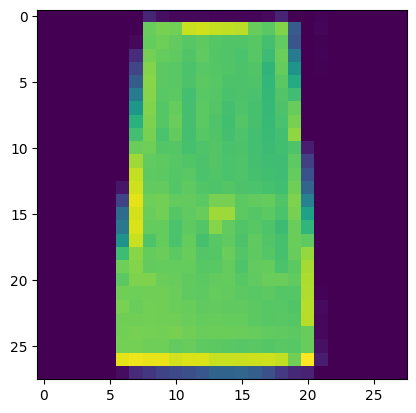

In [127]:
label = incorrect_labels[0][0]
print("The answer is:", my_name[label])
pred = incorrect_pred[0][0]
print("it was incorrectly predicted as:", my_name[pred])
plt.imshow(incorrect_examples[0][0].reshape(28,28))

2. Pullover인데 Coat처럼 생기기도 하였다.

The answer is: Pullover
it was incorrectly predicted as: Coat


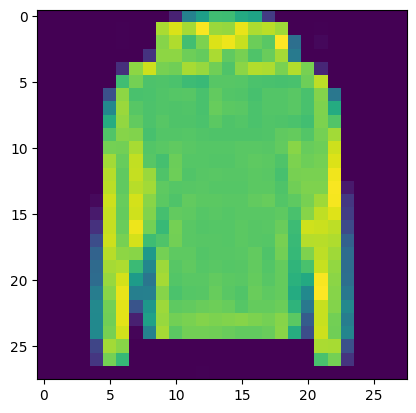

In [128]:
label = incorrect_labels[0][1]
print("The answer is:", my_name[label])
pred = incorrect_pred[0][1]
print("it was incorrectly predicted as:", my_name[pred])
plt.imshow(incorrect_examples[0][1].reshape(28,28))

3. 반대로 coat 인데 pullover 으로 보이기도 한다

The answer is: Coat
it was incorrectly predicted as: Pullover


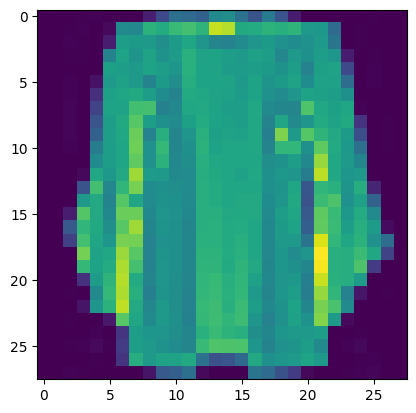

In [129]:
label = incorrect_labels[1][0]
print("The answer is:", my_name[label])
pred = incorrect_pred[1][0]
print("it was incorrectly predicted as:", my_name[pred])
plt.imshow(incorrect_examples[1][0].reshape(28,28))

4. 사람으로써 보기에는 양 옆에 끈처럼 생긴 게 있어 가방인데 컴퓨터가 보기에는 네모난 형태가 티셔츠 같기도 하다

The answer is: Bag
it was incorrectly predicted as: Shirt


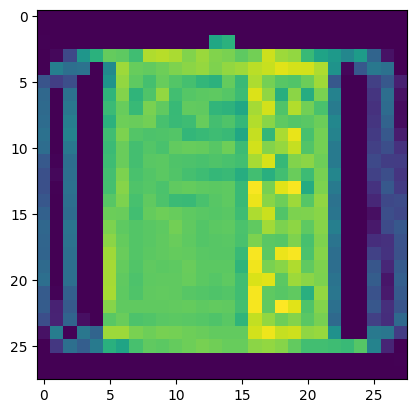

In [130]:
label = incorrect_labels[0][3]
print("The answer is:", my_name[label])
pred = incorrect_pred[0][3]
print("it was incorrectly predicted as:", my_name[pred])
plt.imshow(incorrect_examples[0][3].reshape(28,28))

5. 사람으로써 볼 때는 옆에 천/고무줄 재질로 트여있는 것으로 보아 Ankle boots 인데 컴퓨터가 볼 때는 신발인 건 알겠으나 스니커즈와 구별을 못 한 듯 하다.

The answer is: Ankle boot
it was incorrectly predicted as: Sneaker


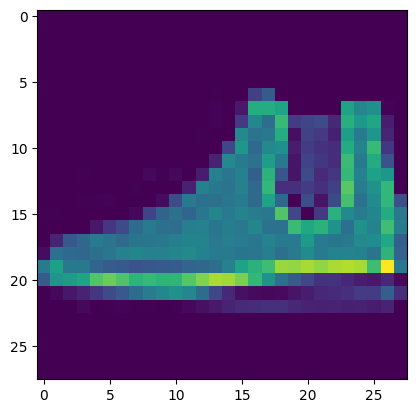

In [131]:
label = incorrect_labels[3][1]
print("The answer is:", my_name[label])
pred = incorrect_pred[3][1]
print("it was incorrectly predicted as:", my_name[pred])
plt.imshow(incorrect_examples[3][1].reshape(28,28))